In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment2/'
FOLDERNAME = '/content/drive/MyDrive/Stanford Research/honor thesis for Ephysics/ephysics project/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
# %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# !bash get_datasets.sh
# %cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive


In [3]:
# !pip install pymatgen
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

import sklearn
import csv
import pandas as pd
# import pymatgen as mg
import random
import os
from bisect import bisect_left   
from sklearn import preprocessing
from sklearn.utils import Bunch
from sklearn import svm
# from mp_api.client import MPRester

#from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import time


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix


style.use("ggplot")

In [4]:
#shuffles dataset
def format_dataset(X, y, size = -1):
    random.seed(a=5)
    length = np.size(y)
    indices = np.arange(length)
    np.random.shuffle(indices)
    new_X = []
    new_y = []
    for x in indices:
        new_X.append(X[x])
        new_y.append(y[x])
    if size == -1:
        return Bunch(data=new_X, target=new_y)
    return Bunch(data=new_X[0:size], target=new_y[0:size])

#pos, neg are lists
def get_labels(pos, neg):
    y = []
    for i in range(len(pos)):
        y.append(1)
    for i in range(len(neg)):
        y.append(0)
    return np.array(y)


def calculate_classification_rates(predictions, labels):
    """
    Calculates the classification rates based on the predictions and labels.

    Args:
    - predictions: NumPy array of predicted values (shape: [n_samples])
    - labels: List of true labels (length: n_samples)

    Returns:
    - true_positive_rate: Float, true positive rate (TPR) or sensitivity
    - false_positive_rate: Float, false positive rate (FPR)
    - true_negative_rate: Float, true negative rate (TNR) or specificity
    - false_negative_rate: Float, false negative rate (FNR)
    """

    # Convert labels to NumPy array for easier manipulation
    labels = np.array(labels)

    # Calculate the number of true positive, false positive, true negative, and false negative
    true_positive = np.sum((predictions == 1) & (labels == 1))
    false_positive = np.sum((predictions == 1) & (labels == 0))
    true_negative = np.sum((predictions == 0) & (labels == 0))
    false_negative = np.sum((predictions == 0) & (labels == 1))

    # Calculate the rates
    true_positive_rate = true_positive / (true_positive + false_negative)
    false_positive_rate = false_positive / (false_positive + true_negative)
    true_negative_rate = true_negative / (true_negative + false_positive)
    false_negative_rate = false_negative / (false_negative + true_positive)

    return true_positive_rate, false_positive_rate, true_negative_rate, false_negative_rate

In [5]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(112, 64, kernel_size=1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(64, 2)  # Assuming binary classification

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.dropout(x)
        x = self.fc(x)
        return x

experiment with multiple:1


<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1244, Train Acc: 95.81%, Val Loss: 0.0290, Val Acc: 99.25%
TP: 0.9850230414746544, TN: 1.0, FP: 0.0, FN: 0.014976958525345621
Epoch [2/10], Train Loss: 0.0242, Train Acc: 99.46%, Val Loss: 0.0145, Val Acc: 99.71%
TP: 0.9942396313364056, TN: 1.0, FP: 0.0, FN: 0.00576036866359447
Epoch [3/10], Train Loss: 0.0154, Train Acc: 99.56%, Val Loss: 0.0128, Val Acc: 99.71%
TP: 0.9942396313364056, TN: 1.0, FP: 0.0, FN: 0.00576036866359447
Epoch [4/10], Train Loss: 0.0122, Train Acc: 99.63%, Val Loss: 0.0105, Val Acc: 99.74%
TP: 0.9953917050691244, TN: 0.9994292237442922, FP: 0.0005707762557077625, FN: 0.004608294930875576
Epoch [5/10], Train Loss: 0.0108, Train Acc: 99.70%, Val Loss: 0.0101, Val Acc: 99.91%
TP: 0.9982718894009217, TN: 1.0, FP: 0.0, FN: 0.0017281105990783411
Epoch [6/10], Train Loss: 0.0078, Train Acc: 99.79%, Val Loss: 0.0076, Val Acc: 99.91%
TP: 0.9982718894009217, TN: 1.0, FP: 0.0, FN: 0.0017281105990783411
Epoch [7/10], Train Loss: 0.0072, Train Acc

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1240, Train Acc: 95.60%, Val Loss: 0.0279, Val Acc: 99.23%
TP: 0.9913594470046083, TN: 0.9931506849315068, FP: 0.00684931506849315, FN: 0.008640552995391706
Epoch [2/10], Train Loss: 0.0262, Train Acc: 99.30%, Val Loss: 0.0114, Val Acc: 99.74%
TP: 0.994815668202765, TN: 1.0, FP: 0.0, FN: 0.005184331797235023
Epoch [3/10], Train Loss: 0.0177, Train Acc: 99.49%, Val Loss: 0.0087, Val Acc: 99.71%
TP: 0.9942396313364056, TN: 1.0, FP: 0.0, FN: 0.00576036866359447
Epoch [4/10], Train Loss: 0.0137, Train Acc: 99.64%, Val Loss: 0.0052, Val Acc: 99.83%
TP: 0.9965437788018433, TN: 1.0, FP: 0.0, FN: 0.0034562211981566822
Epoch [5/10], Train Loss: 0.0096, Train Acc: 99.70%, Val Loss: 0.0050, Val Acc: 99.89%
TP: 0.9982718894009217, TN: 0.9994292237442922, FP: 0.0005707762557077625, FN: 0.0017281105990783411
Epoch [6/10], Train Loss: 0.0083, Train Acc: 99.73%, Val Loss: 0.0050, Val Acc: 99.91%
TP: 0.9982718894009217, TN: 1.0, FP: 0.0, FN: 0.0017281105990783411
Epoch [7/10

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1290, Train Acc: 95.38%, Val Loss: 0.0233, Val Acc: 99.51%
TP: 0.9902130109383995, TN: 1.0, FP: 0.0, FN: 0.00978698906160046
Epoch [2/10], Train Loss: 0.0268, Train Acc: 99.30%, Val Loss: 0.0131, Val Acc: 99.63%
TP: 0.9925158318940702, TN: 1.0, FP: 0.0, FN: 0.007484168105929764
Epoch [3/10], Train Loss: 0.0177, Train Acc: 99.53%, Val Loss: 0.0086, Val Acc: 99.80%
TP: 0.9959700633275763, TN: 1.0, FP: 0.0, FN: 0.004029936672423719
Epoch [4/10], Train Loss: 0.0127, Train Acc: 99.67%, Val Loss: 0.0070, Val Acc: 99.77%
TP: 0.9953943580886586, TN: 1.0, FP: 0.0, FN: 0.004605641911341394
Epoch [5/10], Train Loss: 0.0099, Train Acc: 99.73%, Val Loss: 0.0054, Val Acc: 99.86%
TP: 0.9971214738054116, TN: 1.0, FP: 0.0, FN: 0.0028785261945883708
Epoch [6/10], Train Loss: 0.0078, Train Acc: 99.76%, Val Loss: 0.0041, Val Acc: 99.94%
TP: 0.9988485895221646, TN: 1.0, FP: 0.0, FN: 0.0011514104778353484
Epoch [7/10], Train Loss: 0.0064, Train Acc: 99.81%, Val Loss: 0.0036, Val 

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1215, Train Acc: 96.03%, Val Loss: 0.0275, Val Acc: 99.25%
TP: 0.9855990783410138, TN: 0.9994288977727013, FP: 0.0005711022272986865, FN: 0.014400921658986175
Epoch [2/10], Train Loss: 0.0293, Train Acc: 99.12%, Val Loss: 0.0132, Val Acc: 99.74%
TP: 0.994815668202765, TN: 1.0, FP: 0.0, FN: 0.005184331797235023
Epoch [3/10], Train Loss: 0.0180, Train Acc: 99.48%, Val Loss: 0.0109, Val Acc: 99.71%
TP: 0.9959677419354839, TN: 0.9982866933181039, FP: 0.0017133066818960593, FN: 0.004032258064516129
Epoch [4/10], Train Loss: 0.0145, Train Acc: 99.59%, Val Loss: 0.0067, Val Acc: 99.83%
TP: 0.9965437788018433, TN: 1.0, FP: 0.0, FN: 0.0034562211981566822
Epoch [5/10], Train Loss: 0.0105, Train Acc: 99.69%, Val Loss: 0.0051, Val Acc: 99.80%
TP: 0.9971198156682027, TN: 0.9988577955454027, FP: 0.001142204454597373, FN: 0.002880184331797235
Epoch [6/10], Train Loss: 0.0083, Train Acc: 99.72%, Val Loss: 0.0039, Val Acc: 99.91%
TP: 0.9982718894009217, TN: 1.0, FP: 0.0, FN:

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1222, Train Acc: 95.86%, Val Loss: 0.0309, Val Acc: 99.17%
TP: 0.9855990783410138, TN: 0.9977155910908052, FP: 0.002284408909194746, FN: 0.014400921658986175
Epoch [2/10], Train Loss: 0.0241, Train Acc: 99.37%, Val Loss: 0.0200, Val Acc: 99.48%
TP: 0.9896313364055299, TN: 1.0, FP: 0.0, FN: 0.010368663594470046
Epoch [3/10], Train Loss: 0.0158, Train Acc: 99.51%, Val Loss: 0.0146, Val Acc: 99.54%
TP: 0.9913594470046083, TN: 0.9994288977727013, FP: 0.0005711022272986865, FN: 0.008640552995391706
Epoch [4/10], Train Loss: 0.0113, Train Acc: 99.73%, Val Loss: 0.0136, Val Acc: 99.57%
TP: 0.9913594470046083, TN: 1.0, FP: 0.0, FN: 0.008640552995391706
Epoch [5/10], Train Loss: 0.0090, Train Acc: 99.73%, Val Loss: 0.0099, Val Acc: 99.63%
TP: 0.993663594470046, TN: 0.9988577955454027, FP: 0.001142204454597373, FN: 0.006336405529953917
Epoch [6/10], Train Loss: 0.0095, Train Acc: 99.72%, Val Loss: 0.0103, Val Acc: 99.60%
TP: 0.9919354838709677, TN: 1.0, FP: 0.0, FN: 0

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0514, Train Acc: 98.60%, Val Loss: 0.0093, Val Acc: 99.78%
TP: 0.9948776323278316, TN: 0.9985638374263966, FP: 0.0014361625736033319, FN: 0.005122367672168469
Epoch [2/10], Train Loss: 0.0103, Train Acc: 99.71%, Val Loss: 0.0035, Val Acc: 99.90%
TP: 0.9948776323278316, TN: 1.0, FP: 0.0, FN: 0.005122367672168469
Epoch [3/10], Train Loss: 0.0078, Train Acc: 99.81%, Val Loss: 0.0029, Val Acc: 99.92%
TP: 0.9960159362549801, TN: 1.0, FP: 0.0, FN: 0.00398406374501992
Epoch [4/10], Train Loss: 0.0064, Train Acc: 99.79%, Val Loss: 0.0017, Val Acc: 99.98%
TP: 0.9988616960728515, TN: 1.0, FP: 0.0, FN: 0.0011383039271485487
Epoch [5/10], Train Loss: 0.0041, Train Acc: 99.89%, Val Loss: 0.0017, Val Acc: 99.95%
TP: 0.9977233921457029, TN: 1.0, FP: 0.0, FN: 0.0022766078542970974
Epoch [6/10], Train Loss: 0.0051, Train Acc: 99.84%, Val Loss: 0.0026, Val Acc: 99.95%
TP: 0.9977233921457029, TN: 1.0, FP: 0.0, FN: 0.0022766078542970974
Epoch [7/10], Train Loss: 0.0034, Train A

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0524, Train Acc: 98.38%, Val Loss: 0.0103, Val Acc: 99.71%
TP: 0.9869020501138952, TN: 0.9997127674852794, FP: 0.0002872325147206664, FN: 0.013097949886104784
Epoch [2/10], Train Loss: 0.0100, Train Acc: 99.73%, Val Loss: 0.0067, Val Acc: 99.83%
TP: 0.9920273348519362, TN: 0.9998563837426396, FP: 0.0001436162573603332, FN: 0.007972665148063782
Epoch [3/10], Train Loss: 0.0065, Train Acc: 99.80%, Val Loss: 0.0053, Val Acc: 99.86%
TP: 0.9931662870159453, TN: 1.0, FP: 0.0, FN: 0.00683371298405467
Epoch [4/10], Train Loss: 0.0057, Train Acc: 99.85%, Val Loss: 0.0046, Val Acc: 99.86%
TP: 0.9931662870159453, TN: 1.0, FP: 0.0, FN: 0.00683371298405467
Epoch [5/10], Train Loss: 0.0052, Train Acc: 99.82%, Val Loss: 0.0039, Val Acc: 99.87%
TP: 0.9937357630979499, TN: 1.0, FP: 0.0, FN: 0.006264236902050114
Epoch [6/10], Train Loss: 0.0035, Train Acc: 99.88%, Val Loss: 0.0039, Val Acc: 99.87%
TP: 0.9937357630979499, TN: 1.0, FP: 0.0, FN: 0.006264236902050114
Epoch [7/10]

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0499, Train Acc: 98.62%, Val Loss: 0.0080, Val Acc: 99.77%
TP: 0.9886104783599089, TN: 1.0, FP: 0.0, FN: 0.011389521640091117
Epoch [2/10], Train Loss: 0.0100, Train Acc: 99.74%, Val Loss: 0.0068, Val Acc: 99.79%
TP: 0.989749430523918, TN: 1.0, FP: 0.0, FN: 0.010250569476082005
Epoch [3/10], Train Loss: 0.0080, Train Acc: 99.80%, Val Loss: 0.0041, Val Acc: 99.87%
TP: 0.9965831435079726, TN: 0.9992819187131984, FP: 0.0007180812868016659, FN: 0.003416856492027335
Epoch [4/10], Train Loss: 0.0053, Train Acc: 99.84%, Val Loss: 0.0033, Val Acc: 99.85%
TP: 0.9925968109339408, TN: 1.0, FP: 0.0, FN: 0.007403189066059226
Epoch [5/10], Train Loss: 0.0046, Train Acc: 99.87%, Val Loss: 0.0025, Val Acc: 99.90%
TP: 0.994874715261959, TN: 1.0, FP: 0.0, FN: 0.005125284738041002
Epoch [6/10], Train Loss: 0.0044, Train Acc: 99.87%, Val Loss: 0.0027, Val Acc: 99.92%
TP: 0.9960136674259681, TN: 1.0, FP: 0.0, FN: 0.003986332574031891
Epoch [7/10], Train Loss: 0.0037, Train Acc: 

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0569, Train Acc: 98.16%, Val Loss: 0.0095, Val Acc: 99.75%
TP: 0.9874715261958997, TN: 1.0, FP: 0.0, FN: 0.012528473804100227
Epoch [2/10], Train Loss: 0.0110, Train Acc: 99.69%, Val Loss: 0.0063, Val Acc: 99.87%
TP: 0.9937357630979499, TN: 1.0, FP: 0.0, FN: 0.006264236902050114
Epoch [3/10], Train Loss: 0.0070, Train Acc: 99.80%, Val Loss: 0.0048, Val Acc: 99.93%
TP: 0.9965831435079726, TN: 1.0, FP: 0.0, FN: 0.003416856492027335
Epoch [4/10], Train Loss: 0.0051, Train Acc: 99.83%, Val Loss: 0.0046, Val Acc: 99.93%
TP: 0.9965831435079726, TN: 1.0, FP: 0.0, FN: 0.003416856492027335
Epoch [5/10], Train Loss: 0.0049, Train Acc: 99.84%, Val Loss: 0.0047, Val Acc: 99.97%
TP: 0.9982915717539863, TN: 1.0, FP: 0.0, FN: 0.0017084282460136675
Epoch [6/10], Train Loss: 0.0040, Train Acc: 99.88%, Val Loss: 0.0051, Val Acc: 99.93%
TP: 0.9965831435079726, TN: 1.0, FP: 0.0, FN: 0.003416856492027335
Epoch [7/10], Train Loss: 0.0044, Train Acc: 99.85%, Val Loss: 0.0051, Val 

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0499, Train Acc: 98.69%, Val Loss: 0.0100, Val Acc: 99.67%
TP: 0.983494593056346, TN: 1.0, FP: 0.0, FN: 0.016505406943653957
Epoch [2/10], Train Loss: 0.0099, Train Acc: 99.72%, Val Loss: 0.0049, Val Acc: 99.85%
TP: 0.9926010244735345, TN: 1.0, FP: 0.0, FN: 0.007398975526465566
Epoch [3/10], Train Loss: 0.0072, Train Acc: 99.79%, Val Loss: 0.0052, Val Acc: 99.82%
TP: 0.9908935685828116, TN: 1.0, FP: 0.0, FN: 0.00910643141718839
Epoch [4/10], Train Loss: 0.0063, Train Acc: 99.84%, Val Loss: 0.0030, Val Acc: 99.91%
TP: 0.9954467842914058, TN: 1.0, FP: 0.0, FN: 0.004553215708594195
Epoch [5/10], Train Loss: 0.0054, Train Acc: 99.85%, Val Loss: 0.0022, Val Acc: 99.94%
TP: 0.9982925441092771, TN: 0.9997127262280954, FP: 0.0002872737719046251, FN: 0.001707455890722823
Epoch [6/10], Train Loss: 0.0038, Train Acc: 99.88%, Val Loss: 0.0025, Val Acc: 99.92%
TP: 0.9960159362549801, TN: 1.0, FP: 0.0, FN: 0.00398406374501992
Epoch [7/10], Train Loss: 0.0043, Train Acc: 9

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1179, Train Acc: 96.21%, Val Loss: 0.0743, Val Acc: 97.51%
TP: 0.6231470923603193, TN: 0.997275204359673, FP: 0.0027247956403269754, FN: 0.3768529076396807
Epoch [2/10], Train Loss: 0.0832, Train Acc: 97.37%, Val Loss: 0.0615, Val Acc: 97.94%
TP: 0.685290763968073, TN: 0.9978846981213251, FP: 0.002115301878674889, FN: 0.314709236031927
Epoch [3/10], Train Loss: 0.0738, Train Acc: 97.65%, Val Loss: 0.0571, Val Acc: 97.98%
TP: 0.6767388825541619, TN: 0.9988168650509106, FP: 0.0011831349490893446, FN: 0.3232611174458381
Epoch [4/10], Train Loss: 0.0687, Train Acc: 97.88%, Val Loss: 0.0512, Val Acc: 98.34%
TP: 0.7366020524515393, TN: 0.9988885701993403, FP: 0.0011114298006596874, FN: 0.2633979475484607
Epoch [5/10], Train Loss: 0.0656, Train Acc: 98.00%, Val Loss: 0.0498, Val Acc: 98.35%
TP: 0.7377423033067275, TN: 0.9989244227735551, FP: 0.0010755772264448588, FN: 0.26225769669327254
Epoch [6/10], Train Loss: 0.0628, Train Acc: 98.04%, Val Loss: 0.0471, Val Acc

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1174, Train Acc: 96.17%, Val Loss: 0.0763, Val Acc: 97.67%
TP: 0.6505131128848347, TN: 0.9972392528055645, FP: 0.0027607471944354808, FN: 0.34948688711516535
Epoch [2/10], Train Loss: 0.0809, Train Acc: 97.44%, Val Loss: 0.0658, Val Acc: 97.75%
TP: 0.644811858608894, TN: 0.9984224301746083, FP: 0.0015775698253917034, FN: 0.35518814139110605
Epoch [3/10], Train Loss: 0.0724, Train Acc: 97.71%, Val Loss: 0.0581, Val Acc: 98.20%
TP: 0.7206385404789054, TN: 0.9983865763149403, FP: 0.0016134236850596966, FN: 0.27936145952109465
Epoch [4/10], Train Loss: 0.0674, Train Acc: 97.86%, Val Loss: 0.0568, Val Acc: 98.16%
TP: 0.7269099201824402, TN: 0.9976336452619124, FP: 0.0023663547380875553, FN: 0.27309007981755984
Epoch [5/10], Train Loss: 0.0633, Train Acc: 98.02%, Val Loss: 0.0531, Val Acc: 98.42%
TP: 0.7616875712656784, TN: 0.9982431608762683, FP: 0.0017568391237316697, FN: 0.23831242873432154
Epoch [6/10], Train Loss: 0.0606, Train Acc: 98.13%, Val Loss: 0.0504, 

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1157, Train Acc: 96.30%, Val Loss: 0.0765, Val Acc: 97.63%
TP: 0.6459521094640821, TN: 0.9970241296475566, FP: 0.0029758703524434406, FN: 0.3540478905359179
Epoch [2/10], Train Loss: 0.0804, Train Acc: 97.47%, Val Loss: 0.0653, Val Acc: 98.04%
TP: 0.7092360319270239, TN: 0.9974543759635724, FP: 0.0025456240364275214, FN: 0.29076396807297605
Epoch [3/10], Train Loss: 0.0714, Train Acc: 97.74%, Val Loss: 0.0572, Val Acc: 98.27%
TP: 0.7309007981755986, TN: 0.9985658456132803, FP: 0.0014341543867197304, FN: 0.2690992018244014
Epoch [4/10], Train Loss: 0.0661, Train Acc: 97.89%, Val Loss: 0.0601, Val Acc: 98.19%
TP: 0.7052451539338654, TN: 0.9993187766663081, FP: 0.0006812233336918719, FN: 0.29475484606613456
Epoch [5/10], Train Loss: 0.0623, Train Acc: 98.02%, Val Loss: 0.0512, Val Acc: 98.46%
TP: 0.7793614595210946, TN: 0.9975260836829085, FP: 0.002473916317091535, FN: 0.22063854047890535
Epoch [6/10], Train Loss: 0.0596, Train Acc: 98.14%, Val Loss: 0.0497, Va

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1199, Train Acc: 96.10%, Val Loss: 0.0745, Val Acc: 97.58%
TP: 0.6282782212086659, TN: 0.9976336452619124, FP: 0.0023663547380875553, FN: 0.3717217787913341
Epoch [2/10], Train Loss: 0.0807, Train Acc: 97.44%, Val Loss: 0.0686, Val Acc: 97.81%
TP: 0.6733181299885975, TN: 0.9972392528055645, FP: 0.0027607471944354808, FN: 0.32668187001140253
Epoch [3/10], Train Loss: 0.0719, Train Acc: 97.73%, Val Loss: 0.0574, Val Acc: 98.16%
TP: 0.7360319270239453, TN: 0.9970958373668926, FP: 0.002904162633107454, FN: 0.26396807297605474
Epoch [4/10], Train Loss: 0.0666, Train Acc: 97.94%, Val Loss: 0.0544, Val Acc: 98.25%
TP: 0.7212086659064995, TN: 0.9989602380696282, FP: 0.0010397619303718045, FN: 0.27879133409350054
Epoch [5/10], Train Loss: 0.0631, Train Acc: 98.06%, Val Loss: 0.0537, Val Acc: 98.34%
TP: 0.7348916761687572, TN: 0.9989960919292962, FP: 0.0010039080707038113, FN: 0.2651083238312429
Epoch [6/10], Train Loss: 0.0598, Train Acc: 98.16%, Val Loss: 0.0489, Va

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.1177, Train Acc: 96.15%, Val Loss: 0.0724, Val Acc: 97.73%
TP: 0.6493728620296465, TN: 0.9979563299989244, FP: 0.0020436700010756158, FN: 0.3506271379703535
Epoch [2/10], Train Loss: 0.0821, Train Acc: 97.41%, Val Loss: 0.0624, Val Acc: 98.01%
TP: 0.6955530216647663, TN: 0.9979563299989244, FP: 0.0020436700010756158, FN: 0.30444697833523376
Epoch [3/10], Train Loss: 0.0738, Train Acc: 97.70%, Val Loss: 0.0545, Val Acc: 98.37%
TP: 0.7474344355758267, TN: 0.9985299917536122, FP: 0.0014700082463877237, FN: 0.2525655644241733
Epoch [4/10], Train Loss: 0.0680, Train Acc: 97.86%, Val Loss: 0.0534, Val Acc: 98.31%
TP: 0.7633979475484607, TN: 0.9969524219282205, FP: 0.003047578071779427, FN: 0.23660205245153934
Epoch [5/10], Train Loss: 0.0654, Train Acc: 97.97%, Val Loss: 0.0525, Val Acc: 98.38%
TP: 0.7924743443557583, TN: 0.9958409522785128, FP: 0.004159047721487218, FN: 0.20752565564424175
Epoch [6/10], Train Loss: 0.0622, Train Acc: 98.06%, Val Loss: 0.0473, Val

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0599, Train Acc: 98.48%, Val Loss: 0.0495, Val Acc: 98.52%
TP: 0.04075774971297359, TN: 0.9999731202064368, FP: 2.6879793563185434e-05, FN: 0.9592422502870264
Epoch [2/10], Train Loss: 0.0524, Train Acc: 98.58%, Val Loss: 0.0471, Val Acc: 98.65%
TP: 0.13260619977037888, TN: 0.9998208013762454, FP: 0.00017919862375456958, FN: 0.8673938002296211
Epoch [3/10], Train Loss: 0.0505, Train Acc: 98.63%, Val Loss: 0.0484, Val Acc: 98.57%
TP: 0.07290470723306544, TN: 0.9999910400688122, FP: 8.959931187728478e-06, FN: 0.9270952927669346
Epoch [4/10], Train Loss: 0.0489, Train Acc: 98.66%, Val Loss: 0.0449, Val Acc: 98.72%
TP: 0.1727898966704937, TN: 0.999901440756935, FP: 9.855924306501326e-05, FN: 0.8272101033295063
Epoch [5/10], Train Loss: 0.0481, Train Acc: 98.68%, Val Loss: 0.0430, Val Acc: 98.73%
TP: 0.182548794489093, TN: 0.9998387212386209, FP: 0.0001612787613791126, FN: 0.817451205510907
Epoch [6/10], Train Loss: 0.0473, Train Acc: 98.68%, Val Loss: 0.0442, Va

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0612, Train Acc: 98.45%, Val Loss: 0.0489, Val Acc: 98.58%
TP: 0.08495981630309989, TN: 0.999901440756935, FP: 9.855924306501326e-05, FN: 0.9150401836969001
Epoch [2/10], Train Loss: 0.0525, Train Acc: 98.58%, Val Loss: 0.0458, Val Acc: 98.61%
TP: 0.09758897818599312, TN: 0.999964160275249, FP: 3.583972475091391e-05, FN: 0.9024110218140069
Epoch [3/10], Train Loss: 0.0505, Train Acc: 98.61%, Val Loss: 0.0456, Val Acc: 98.70%
TP: 0.16073478760045926, TN: 0.9999193606193104, FP: 8.06393806895563e-05, FN: 0.8392652123995408
Epoch [4/10], Train Loss: 0.0492, Train Acc: 98.64%, Val Loss: 0.0443, Val Acc: 98.70%
TP: 0.16475315729047071, TN: 0.999865601032184, FP: 0.00013439896781592718, FN: 0.8352468427095293
Epoch [5/10], Train Loss: 0.0480, Train Acc: 98.68%, Val Loss: 0.0421, Val Acc: 98.77%
TP: 0.21239954075774972, TN: 0.9998208013762454, FP: 0.00017919862375456958, FN: 0.7876004592422503
Epoch [6/10], Train Loss: 0.0474, Train Acc: 98.68%, Val Loss: 0.0419, V

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0599, Train Acc: 98.47%, Val Loss: 0.0523, Val Acc: 98.53%
TP: 0.04649827784156142, TN: 0.9999731202064368, FP: 2.6879793563185434e-05, FN: 0.9535017221584385
Epoch [2/10], Train Loss: 0.0521, Train Acc: 98.59%, Val Loss: 0.0483, Val Acc: 98.64%
TP: 0.1182548794489093, TN: 0.9999462404128736, FP: 5.375958712637087e-05, FN: 0.8817451205510907
Epoch [3/10], Train Loss: 0.0504, Train Acc: 98.63%, Val Loss: 0.0458, Val Acc: 98.72%
TP: 0.1791044776119403, TN: 0.9997849616514946, FP: 0.00021503834850548347, FN: 0.8208955223880597
Epoch [4/10], Train Loss: 0.0485, Train Acc: 98.66%, Val Loss: 0.0452, Val Acc: 98.70%
TP: 0.1584385763490241, TN: 0.9998924808257472, FP: 0.00010751917425274174, FN: 0.8415614236509759
Epoch [5/10], Train Loss: 0.0475, Train Acc: 98.68%, Val Loss: 0.0444, Val Acc: 98.70%
TP: 0.16704936854190586, TN: 0.9997849616514946, FP: 0.00021503834850548347, FN: 0.8329506314580941
Epoch [6/10], Train Loss: 0.0469, Train Acc: 98.70%, Val Loss: 0.0436

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0601, Train Acc: 98.48%, Val Loss: 0.0498, Val Acc: 98.54%
TP: 0.04879448909299656, TN: 1.0, FP: 0.0, FN: 0.9512055109070034
Epoch [2/10], Train Loss: 0.0521, Train Acc: 98.59%, Val Loss: 0.0477, Val Acc: 98.62%
TP: 0.10562571756601608, TN: 0.9999820799770623, FP: 1.792002293762936e-05, FN: 0.894374282433984
Epoch [3/10], Train Loss: 0.0506, Train Acc: 98.63%, Val Loss: 0.0449, Val Acc: 98.69%
TP: 0.15097588978185994, TN: 0.9999283199082495, FP: 7.168009175051744e-05, FN: 0.8490241102181401
Epoch [4/10], Train Loss: 0.0487, Train Acc: 98.67%, Val Loss: 0.0427, Val Acc: 98.74%
TP: 0.19345579793340986, TN: 0.9997939197362172, FP: 0.00020608026378273763, FN: 0.8065442020665902
Epoch [5/10], Train Loss: 0.0478, Train Acc: 98.68%, Val Loss: 0.0437, Val Acc: 98.74%
TP: 0.18714121699196326, TN: 0.9998476798050302, FP: 0.00015232019496984957, FN: 0.8128587830080367
Epoch [6/10], Train Loss: 0.0471, Train Acc: 98.70%, Val Loss: 0.0425, Val Acc: 98.73%
TP: 0.190585533

<ipython-input-6-6851e15e6d95>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
<ipython-input-6-6851e15e6d95>:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
<ipython-input-6-6851e15e6d95>:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTens

Epoch [1/10], Train Loss: 0.0601, Train Acc: 98.47%, Val Loss: 0.0498, Val Acc: 98.57%
TP: 0.07175660160734787, TN: 0.9999462399311871, FP: 5.376006881288808e-05, FN: 0.9282433983926521
Epoch [2/10], Train Loss: 0.0522, Train Acc: 98.59%, Val Loss: 0.0477, Val Acc: 98.65%
TP: 0.13605051664753157, TN: 0.9998028797476861, FP: 0.00019712025231392297, FN: 0.8639494833524685
Epoch [3/10], Train Loss: 0.0503, Train Acc: 98.62%, Val Loss: 0.0463, Val Acc: 98.66%
TP: 0.13030998851894374, TN: 0.9999372799197183, FP: 6.272008028170276e-05, FN: 0.8696900114810563
Epoch [4/10], Train Loss: 0.0488, Train Acc: 98.66%, Val Loss: 0.0455, Val Acc: 98.70%
TP: 0.16130884041331803, TN: 0.9998655998279677, FP: 0.0001344001720322202, FN: 0.838691159586682
Epoch [5/10], Train Loss: 0.0481, Train Acc: 98.68%, Val Loss: 0.0432, Val Acc: 98.76%
TP: 0.20780711825487944, TN: 0.9998207997706237, FP: 0.0001792002293762936, FN: 0.7921928817451206
Epoch [6/10], Train Loss: 0.0471, Train Acc: 98.69%, Val Loss: 0.0429,

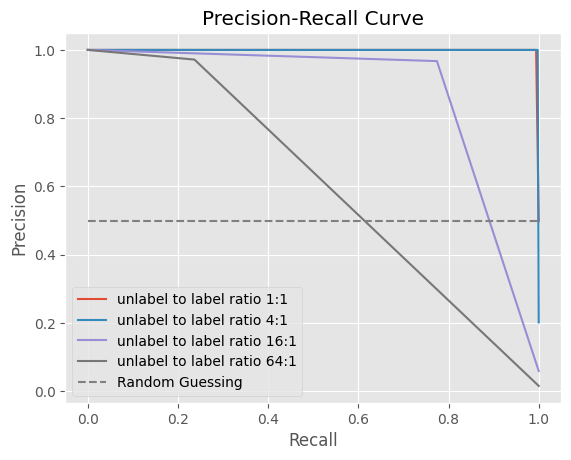

In [6]:
multipliers = [1,4, 16, 64] #1, 2, 4, 8, 16, 32, 64, 128
test_accs = []
test_losses = []
for multip in multipliers:
  print('experiment with multiple:' + str(multip))
  ## loading data
  X_pos = np.load(FOLDERNAME + '/partial_perfect_in_icsd.npy')
  X_neg = np.load(FOLDERNAME + '/not_in_icsd_proofread.npy')
  X_neg = X_neg[:10899*multip, :]

  #concatenate the features together and scale
  X = np.concatenate((X_pos, X_neg), axis = 0)
  std_scale=preprocessing.StandardScaler().fit(X)
  X = std_scale.transform(X)

  #get output label
  y = []

  y=get_labels(X_pos,X_neg)

  # Split the data into training and testing sets
  X_da_train, X_test, y_da_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

  # Check if GPU is available
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # Convert the data to PyTorch tensors and move them to the GPU
  X_da_train = torch.tensor(X_da_train, dtype=torch.float32).to(device)
  y_da_train = torch.tensor(y_da_train, dtype=torch.float32).to(device)
  X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
  y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
  skf = StratifiedKFold(n_splits=5, shuffle=True)

  # Hyperparameters
  batch_size = 32
  learning_rate = 0.001
  num_epochs = 10

  # Lists to store losses and accuracies
  train_losses = []
  val_losses = []
  train_accs = []
  val_accs = []

  # Perform k-fold cross-validation
  for train_index, val_index in skf.split(X_da_train.cpu().numpy(), y_da_train.cpu().numpy()):
      # Move the data back to CPU
      X_train, X_val = X_da_train[train_index].cpu(), X_da_train[val_index].cpu()
      y_train, y_val = y_da_train[train_index].cpu(), y_da_train[val_index].cpu()

      # Convert data to PyTorch tensors and move to device
      X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
      y_train = torch.tensor(y_train, dtype=torch.long).to(device)
      X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
      y_val = torch.tensor(y_val, dtype=torch.long).to(device)

      X_val = X_val.unsqueeze(1).permute(0,2,1)

      # Create DataLoader for batch training
      train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
      train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

      # Initialize model, loss function, and optimizer
      # Initialize the CNN model and move it to the GPU
      model = CNN().to(device)

      # Define the loss function, optimizer, and learning rate
      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(model.parameters(), lr=0.001)

      # Training loop
      for epoch in range(num_epochs):
          model.train()
          running_loss = 0.0
          correct = 0
          total = 0

          for inputs, labels in train_loader:
            optimizer.zero_grad()
            
            inputs = inputs.unsqueeze(1).permute(0,2,1)
            # print(inputs.shape)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
          
          # Compute training accuracy and loss
          train_acc = 100 * correct / total
          train_loss = running_loss / len(train_loader)

          # Record training accuracy and loss
          train_accs.append(train_acc)
          train_losses.append(train_loss)

          # Evaluation on validation set
          model.eval()
          with torch.no_grad():
            
            # print(X_val.shape)
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_acc = 100 * (val_predicted == y_val).sum().item() / y_val.size(0)
            # Record validation accuracy and loss
            val_accs.append(val_acc)
            val_losses.append(val_loss.item())

            # Calculate confusion matrix
            val_true = y_val.cpu().numpy()
            val_pred = val_predicted.cpu().numpy()
            tn, fp, fn, tp = confusion_matrix(val_true, val_pred).ravel()

            # Calculate rates
            val_tp_rate = tp / (tp + fn)
            val_tn_rate = tn / (tn + fp)
            val_fp_rate = fp / (fp + tn)
            val_fn_rate = fn / (fn + tp)

            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
                  f"Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc:.2f}%")
            print(f"TP: {val_tp_rate}, " f"TN: {val_tn_rate}, " f"FP: {val_fp_rate}, " f"FN: {val_fn_rate}")
  # Testing
  with torch.no_grad():
    X_test = X_test.unsqueeze(1).permute(0,2,1)
    test_outputs = model(X_test)
    y_test = y_test.long()
    test_loss = criterion(test_outputs, y_test)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_acc = 100 * (test_predicted == y_test).sum().item() / y_test.size(0)
    test_tp = ((test_predicted == 1) & (y_test == 1)).sum().item()
    test_tn = ((test_predicted == 0) & (y_test == 0)).sum().item()
    test_fp = ((test_predicted == 1) & (y_test == 0)).sum().item()
    test_fn = ((test_predicted == 0) & (y_test == 1)).sum().item()
    # Record testing accuracy and loss
    test_accs.append(test_acc)
    test_losses.append(test_loss.item())

    print(f"Testing - "
          f"Loss: {test_loss.item():.4f}, "
          f"Acc: {test_acc:.2f}%, "
          f"TP: {test_tp}, "
          f"TN: {test_tn}, "
          f"FP: {test_fp}, "
          f"FN: {test_fn}")
    precision, recall, _ = precision_recall_curve(val_true, val_pred)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f"unlabel to label ratio {multip}:1")

# Plot random guessing line
plt.plot([0, 1], [0.5, 0.5], linestyle="--", color="gray", label="Random Guessing")

# Set plot properties
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

# Show the plot
plt.show()